In [1]:
import numpy as np
import pandas as pd
from openpyxl import load_workbook

import warnings
warnings.filterwarnings("ignore")

# Dog's basic and identification data

## Import data

In [20]:
df_members = pd.read_excel('./../data/source/Wild_Runners_Flyball_Team_base_data.xlsx')

# Check basic properties
print(len(df_members))
df_members.head()

51


,host,name,breed,sex,castrated,birth_date,chip_number,ulna_length,hurdle_height
0,TM800418,Dexter,Kooikerhondje,male,neutral,2010-02-14,93900005238999,14.05,25.0
1,NP950613,Jasper,Border Collie,male,neutral,2011-03-28,93900007189034,16.56,30.0
2,UF830429,Angie,Border,female,neutral,2014-02-06,93900003827629,15.22,27.5
3,ZE801127,Alex,Border Collie,male,neutral,2014-04-22,93900003598960,17.95,32.5
4,DP910919,Ashley,border collie,female,neutral,2015-01-26,93900009738344,18.30,32.5


In [21]:
df_members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host           51 non-null     object        
 1   name           51 non-null     object        
 2   breed          51 non-null     object        
 3   sex            51 non-null     object        
 4   castrated      51 non-null     object        
 5   birth_date     51 non-null     datetime64[ns]
 6   chip_number    51 non-null     int64         
 7   ulna_length    51 non-null     float64       
 8   hurdle_height  51 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 3.7+ KB


## Data cleaning

In [22]:
# Check basic distribution, and whether there is incorrect data record
print(df_members['sex'].value_counts())
print(df_members['castrated'].value_counts())

sex
male      30
female    21
Name: count, dtype: int64
castrated
neutral    41
sexual     10
Name: count, dtype: int64


In [23]:
# Check the breed variable too
df_members['breed'].value_counts()

breed
Border Collie                     15
Border                             5
Mix                                5
BorderCollie                       3
border collie                      3
mixed                              3
Belgian shepherd - Malinois        3
Australian Kelpie                  2
Parson Russell terrier             2
Mudi                               1
Patterdale terrier                 1
Australian Shepperd                1
Kooikerhondje                      1
Sheltie                            1
Small schnauzer                    1
Magyar Vizsla                      1
Jack Russell Terrier               1
American Staffordshire Terrier     1
Whippet                            1
Name: count, dtype: int64

In [24]:
# Unify 'Border Collie' and 'Mix'breeds
df_members['breed'] = df_members['breed'].str.lower()

df_members.loc[df_members['breed'].str.contains('border'), 'breed'] = 'border'
df_members.loc[df_members['breed'].str.contains('mixed'), 'breed'] = 'mix'
df_members['breed'].value_counts()


breed
border                            26
mix                                8
belgian shepherd - malinois        3
australian kelpie                  2
parson russell terrier             2
kooikerhondje                      1
american staffordshire terrier     1
jack russell terrier               1
magyar vizsla                      1
small schnauzer                    1
sheltie                            1
australian shepperd                1
patterdale terrier                 1
mudi                               1
whippet                            1
Name: count, dtype: int64

In [25]:
# Checking the basic statistical values, whether there are outlier

table = df_members.describe()
table.style.bar(color='#d65f5f')

,birth_date,chip_number,ulna_length,hurdle_height
count,51,51.000000,51.000000,51.000000
mean,2018-02-01 16:56:28.235294208,93900005643998.296875,21.173922,28.039216
min,2010-02-14 00:00:00,93900001206699.000000,1.209000,15.000000
25%,2016-03-29 12:00:00,93900003542806.500000,14.960000,26.250000
50%,2018-03-08 00:00:00,93900005539134.000000,16.280000,27.500000
75%,2020-06-30 12:00:00,93900008311913.000000,17.775000,32.500000
max,2022-05-02 00:00:00,93900009884426.000000,175.500000,32.500000
std,nan,2736044.980155,29.464890,4.281172


In [26]:
# There are duplicates in the dog's name?
pd.unique(df_members['name']).shape

(51,)

In [27]:
# Distribution of birth year
df_members['birth_date'].dt.year.head()

0    2010
1    2011
2    2014
3    2014
4    2015
Name: birth_date, dtype: int32

In [28]:
# Calculate the age from the birth date
now = pd.Timestamp('now')
df_members['age'] = now.year - df_members['birth_date'].dt.year

In [29]:
# Check the leg length column - outliers
df_members.sort_values(by='ulna_length', ascending=False).head()

,host,name,breed,sex,castrated,birth_date,chip_number,ulna_length,hurdle_height,age
25,IN920805,Bruno,border,male,neutral,2018-03-08,93900002928155,175.50,32.5,6
37,DU050516,Falco,border,female,neutral,2020-04-20,93900009884426,152.80,27.5,4
4,DP910919,Ashley,border,female,neutral,2015-01-26,93900009738344,18.30,32.5,9
30,EH831207,Rocky,belgian shepherd - malinois,male,neutral,2018-12-22,93900003818036,18.29,32.5,6
17,KL920415,Bailey,border,female,neutral,2017-05-04,93900004198045,18.16,32.5,7


In [30]:
# There are 2 outlier values - remove this
df_members['ulna_length'].iloc[25]=16
df_members['ulna_length'].iloc[37]=19

In [31]:
# Export the cleaned data to a csv
df_members.to_csv('./../data/cleaned/dogs_data.csv',index=False)

# EFC race data
## Import data

In [32]:
# Read the race data from the Excel file by tables
df_efc_1 = pd.read_excel('./../data/source/EFC_race_data.xlsx',sheet_name=0,header=1, usecols='B:T')

df_efc_1['when'] = df_efc_1['when'].apply(lambda x: x.replace(year = 2023, month = 7, day=29))
df_efc_1['race_name'] = 1

In [33]:
df_efc_2 = pd.read_excel('./../data/source/EFC_race_data.xlsx',sheet_name=1,header=1, usecols='B:T')

df_efc_2['when'] = df_efc_2['when'].apply(lambda x: x.replace(year = 2023, month = 7, day=29))
df_efc_2['race_name'] = 2

In [34]:
df_efc_3 = pd.read_excel('./../data/source/EFC_race_data.xlsx',sheet_name=2,header=1, usecols='B:T')

df_efc_3['when'] = df_efc_3['when'].apply(lambda x: x.replace(year = 2023, month = 7, day=30))
df_efc_3['race_name'] = 1

In [35]:
df_efc_4 = pd.read_excel('./../data/source/EFC_race_data.xlsx',sheet_name=3,header=1, usecols='B:T')

df_efc_4['when'] = df_efc_4['when'].apply(lambda x: x.replace(year = 2023, month = 7, day=30))
df_efc_4['race_name'] = 2

In [36]:
# Concat the imported tables
df_efc = pd.concat([df_efc_1,df_efc_2,df_efc_3,df_efc_4])

In [37]:
# Import the track colors according to the color's of the Excel cells

# Import excel file
wb = load_workbook('./../data/source/EFC_race_data.xlsx')
sheet_names = ['EFC_1 ring_1', 'EFC_1 ring_2', 'EFC_2 ring_1', 'EFC_2 ring_2']
data = []
for sheet_name in sheet_names:
  # Iterate thorugh each tab
  sheet = wb[sheet_name]

  # Detect the row color one by one
  for row in sheet.iter_rows(min_row=2):
    cell = row[3]
    cell_color = cell.fill.start_color.index  # Color index
    text_value = cell.value
    # Append the color index to the output variable
    data.append((text_value, cell_color))

# Generate a new dataframe, already with the track colors
df_efc_track = pd.DataFrame(data, columns=['name','color'])

df_efc_track.drop(df_efc_track[df_efc_track['color']=='00000000'].index, inplace=True)
df_efc_track.drop(df_efc_track[df_efc_track['color']==10].index, inplace=True)

In [38]:
# Concat the track color's table to the basic race data table
df_efc_track.reset_index(inplace=True)
df_efc.reset_index(inplace=True)
df_efc = pd.concat([df_efc, df_efc_track['color']],axis=1,ignore_index=True)
df_efc.drop(0,axis=1,inplace=True)
df_efc.columns=['Division', 'when', 'who', 'with who', 'total time', 'W/L/T', 'Hurdles','name', 'start', '1.dog', 'name.1', 'chng', '2.dog', 'name.2', 'chng.1','3.dog', 'name.3', 'chng.2', '4.dog', 'race_name','track']

df_efc.head()

,Division,when,who,with who,total time,W/L/T,Hurdles,name,start,1.dog,...,chng,2.dog,name.2,chng.1,3.dog,name.3,chng.2,4.dog,race_name,track
0,13,2023-07-29 12:26:30,Real Ballance Flyball Team,WildRunners Zephyr,21.18,L,15.0,Chase,0.330,4.21,...,0.64,4.89,Zuma,0.36,4.3,Marshall,0.3,6.14,1,4
1,13,2023-07-29 12:26:30,WildRunners Zephyr,Real Ballance Flyball Team,20.49,W,25.0,Brix,-0.030,4.58,...,OK,5.2,Negro,0.51,4.89,Speedy,0.4,4.93,1,5
2,13,2023-07-29 12:27:58,Real Ballance Flyball Team,WildRunners Zephyr,20.81,W,15.0,Chase,0.008,4.24,...,0.18,5.03,Zuma,0.18,4.51,Marshall,0.24,6.42,1,4
3,13,2023-07-29 12:27:58,WildRunners Zephyr,Real Ballance Flyball Team,20.85,L,25.0,Brix,0.150,4.42,...,0.37,5.19,Negro,0.2,5.27,Speedy,error,5.24,1,5
4,13,2023-07-29 12:29:11,Real Ballance Flyball Team,WildRunners Zephyr,20.66,W,15.0,Chase,0.090,4.24,...,0.33,5.13,Zuma,Ok,4.67,Marshall,0.12,6.09,1,4


## Data cleaning

In [39]:
df_efc['championship'] = 'efc'
df_efc['location'] = 'Tapioszentmarton'
df_efc.tail()

,Division,when,who,with who,total time,W/L/T,Hurdles,name,start,1.dog,...,name.2,chng.1,3.dog,name.3,chng.2,4.dog,race_name,track,championship,location
1171,5,2023-07-30 17:17:21,Akela All in,JokerZ Sid,17.09,W,22.5,Reed,0.09,3.92,...,Ízisz,OK,4.43,Oszkár,0.59,3.99,2,5,efc,Tapioszentmarton
1172,5,2023-07-30 17:18:14,JokerZ Sid,Akela All in,16.99,L,22.5,Twister,0.10,4.26,...,Armando,OK,4.21,Zara,ok,4.11,2,4,efc,Tapioszentmarton
1173,5,2023-07-30 17:18:14,Akela All in,JokerZ Sid,16.61,W,22.5,Reed,0.01,3.87,...,Ízisz,Ok,4.53,Oszkár,0.18,3.98,2,5,efc,Tapioszentmarton
1174,5,2023-07-30 17:19:09,JokerZ Sid,Akela All in,17.05,L,22.5,Twister,-0.03,4.22,...,Armando,ok,4.3,Zara,ok,4.16,2,4,efc,Tapioszentmarton
1175,5,2023-07-30 17:19:09,Akela All in,JokerZ Sid,17.33,W,22.5,Reed,0.02,3.87,...,Ízisz,0.59,4.48,Oszkár,0.26,3.84,2,5,efc,Tapioszentmarton


In [40]:
df_efc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Division      1176 non-null   int64         
 1   when          1176 non-null   datetime64[ns]
 2   who           1176 non-null   object        
 3   with who      1176 non-null   object        
 4   total time    1176 non-null   float64       
 5   W/L/T         1166 non-null   object        
 6   Hurdles       1146 non-null   float64       
 7   name          1149 non-null   object        
 8   start         1176 non-null   float64       
 9   1.dog         1176 non-null   object        
 10  name.1        1141 non-null   object        
 11  chng          1150 non-null   object        
 12  2.dog         1168 non-null   object        
 13  name.2        1146 non-null   object        
 14  chng.1        1149 non-null   object        
 15  3.dog         1166 non-null   object  

<Axes: >

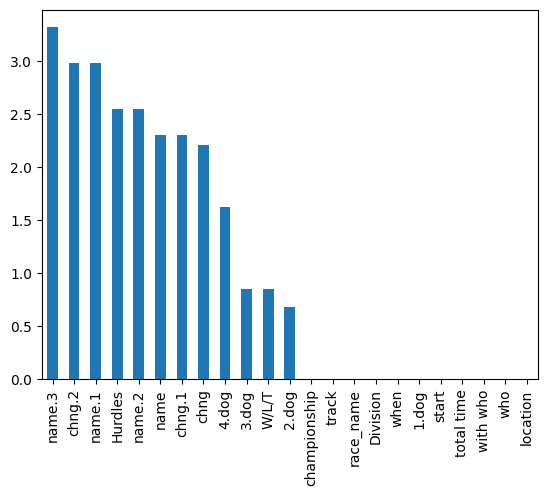

In [41]:
# Check the missing rows - in %

((df_efc.isna().sum()/len(df_efc))*100).round(2).sort_values(ascending=False).plot.bar()

# CZ race data

## Import data

In [42]:
# Import the track colors, as above

wb = load_workbook('./../data/source/FLYBALLCZ_race_data.xlsx')
sheet_names = ['Hanácké škvarek', 'Eager´s Cup 1', 'Eager´s Cup 2', 'Flyvaryors turnaj', 'MEDs Trophy', 'BCCCZ mistrovství', 'Crazy Cup', 'Máchale, spadlo ti to!', 'Mistrovství České republiky', 'Křupky na břehu', 'Budějckej xtreme 1', 'Budějckej xtreme 2']
data = []
for sheet_name in sheet_names:
  sheet = wb[sheet_name]
  for row in sheet.iter_rows(min_row=2):
    cell = row[3]
    cell_color = cell.fill.start_color.index
    text_value = cell.value
    data.append((text_value, cell_color))

df_cz_track = pd.DataFrame(data, columns=['name','color'])
df_cz_track.drop(df_cz_track[df_cz_track['color']=='00000000'].index, inplace=True)

df_cz_track.dropna(inplace=True)

In [43]:
import re
from datetime import datetime

# Concat the race date to every row. This was included by the Excel's metadata originally
# Define the function for this here:

def extract_date(input_str):
    # define regex to find the date cell
    pattern = r'(\d{4})\.\s*([a-zA-Zéíúáőűöüó]+)\s*(\d{1,2})-(\d{1,2})'

    # search matches according to regex
    match = re.search(pattern, input_str)

    if match:
        # extract the matched cell into year, month and day
        year = int(match.group(1))
        month_str = match.group(2)
        day_start = int(match.group(3))
        day_end = int(match.group(4))

        # convert string dates to numbers (define even in hungarian and english)
        months_dict = {
            'január': 1, 'február': 2, 'március': 3, 'április': 4,
            'május': 5, 'június': 6, 'július': 7, 'augusztus': 8,
            'szeptember': 9, 'október': 10, 'november': 11, 'december': 12,
            'january': 1, 'february': 2, 'march': 3, 'april': 4,
            'may': 5, 'june': 6, 'july': 7, 'august': 8,
            'september': 9, 'october': 10, 'november': 11, 'december': 12,
            'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
            'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
            'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12,
        }
        month = months_dict.get(month_str.lower(), None)

        if month:
            # save into datetime format
            start_date = datetime(year, month, day_start)
            end_date = datetime(year, month, day_end)

            return start_date, end_date

    # None, if no match found
    return None, None

# convert timestring into datetime function
def convert_to_datetime(time_str):
    return pd.to_datetime(time_str, format='%H:%M:%S')

# If there was a multi-day competition, then the date value has to increment for the second day, for example. The function for this:
def handle_day_increment(row):
    global prev_time, other_day
    current_time = row['datetime']
    if current_time < prev_time or other_day == True:  # Increment if the clock resets (new day starts)
        row['datetime'] = row['datetime'] + pd.DateOffset(days=1)  # then increase the date by 1 day
        other_day = True
    prev_time = current_time
    return row['datetime']

In [44]:
df_cz = pd.DataFrame([])

# Now, let's apply the above defined custom functions

for i in np.arange(0,12):
    id = pd.read_excel('./../data/source/FLYBALLCZ_race_data.xlsx',sheet_name=i,header=0, usecols='B',nrows=0)
    id = id.to_string()
    start_date, end_date = extract_date(id)

    df_cz_act = pd.read_excel('./../data/source/FLYBALLCZ_race_data.xlsx',sheet_name=i,header=1, usecols='B:T')
    df_cz_act.dropna(axis=0, how='all', inplace=True)

    # convert the time data into datetime
    df_cz_act['kdy'] = df_cz_act['kdy'].apply(convert_to_datetime)

    # add year:month:day column
    df_cz_act['datetime'] = df_cz_act.apply(lambda row: start_date + pd.to_timedelta(row['kdy'].strftime('%H:%M:%S')), axis=1)

    # Create a variable to track time increase (for when to increment tha data by 1 day)
    prev_time = df_cz_act.iloc[0][-1]
    other_day = False

    # Apply the custom function for day incrementation
    df_cz_act['time'] = df_cz_act.apply(handle_day_increment, axis=1)

    # Remove kdy és datetime columns
    df_cz_act.drop(['kdy','datetime'],axis=1, inplace=True)
    
    # Concat the race location variable
    df_cz_act['location'] = id[id.find("(")+1:id.find(")")]
    
    # Than concat the remaining columns
    df_cz = pd.concat([df_cz, df_cz_act], ignore_index=True)
    
df_cz # And check the result df

,Divize,kdo,s kým,celkem,V/P/R,překážky,jméno,start,1.pes,jméno.1,stříd.,2.pes,jméno.2,stříd..1,3.pes,jméno.3,stříd..2,4.pes,time,location
0,1.0,WildRunners dreamers,WildRunners Maximini,17.01,P,25.0,Sunny,-0.24,4.21,Dixie,0.3,4.24,Alex,0.16,4.22,Hector,ok,4.13,2023-04-22 10:11:57,Heroltice
1,1.0,WildRunners Maximini,WildRunners dreamers,19.43,P,25.0,Brooke,-0.11,4.08,Rocky,1.29,5.15,Bella,0.23,4.52,Bree,OK,4.28,2023-04-22 10:11:57,Heroltice
2,1.0,WildRunners dreamers,WildRunners Maximini,17.42,V,25.0,Sunny,0.02,4.25,Dixie,0.15,4.23,Alex,0.34,4.25,Hector,OK,4.18,2023-04-22 10:13:25,Heroltice
3,1.0,WildRunners Maximini,WildRunners dreamers,18.59,P,25.0,Brooke,-0.63,4.25,Rocky,0.79,5.5,Bella,0.16,4.56,Bree,-0.33,4.28,2023-04-22 10:13:25,Heroltice
4,1.0,WildRunners dreamers,WildRunners Maximini,16.73,V,25.0,Sunny,-0.06,4.21,Dixie,-0.19,4.29,Alex,0.12,4.27,Hector,chyba,4.08,2023-04-22 10:15:06,Heroltice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,8.0,FUNatic Jumpers,Akela Sparks,21.30,V,15.0,Pepina,0.07,4.62,Gina,OK,6.55,Hanneli,0.31,mimo,And,NaN,5.38,2023-10-15 17:55:34,Vodňany
7391,8.0,Akela Sparks,FUNatic Jumpers,19.74,V,15.0,Cooper,0.01,4.26,Alba,0.33,5.19,Roy,0.22,4.49,Zoya,0.38,mimo,2023-10-15 17:57:19,Vodňany
7392,8.0,FUNatic Jumpers,Akela Sparks,19.89,P,15.0,Pepina,0.11,4.6,Gina,ok,5.26,Hanneli,OK,4.46,And,0.2,5.27,2023-10-15 17:57:19,Vodňany
7393,8.0,Akela Sparks,FUNatic Jumpers,28.74,P,15.0,Cooper,0.10,4.27,Alba,0.29,5.15,Roy,0.24,4.43,Zoya,0.48,4.87,2023-10-15 17:59:17,Vodňany


In [45]:
df_cz.columns

Index(['Divize', 'kdo', 's kým', 'celkem', 'V/P/R', 'překážky', 'jméno',
       'start', '1.pes', 'jméno.1', 'stříd.', '2.pes', 'jméno.2', 'stříd..1',
       '3.pes', 'jméno.3', 'stříd..2', '4.pes', 'time', 'location'],
      dtype='object')

In [46]:
# Concat the track color variable to the basic df
df_cz_track.reset_index(inplace=True)
df_cz.reset_index(inplace=True)
df_cz = pd.concat([df_cz, df_cz_track['color']],axis=1,ignore_index=True)
df_cz.drop(0,axis=1,inplace=True)
df_cz.columns=['Divize', 'kdo', 's kým', 'celkem', 'V/P/R', 'překážky', 'jméno','start', '1.pes', 'jméno.1', 'stříd.', '2.pes', 'jméno.2', 'stříd..1','3.pes', 'jméno.3', 'stříd..2', '4.pes', 'time','location','track']
df_cz

,Divize,kdo,s kým,celkem,V/P/R,překážky,jméno,start,1.pes,jméno.1,...,2.pes,jméno.2,stříd..1,3.pes,jméno.3,stříd..2,4.pes,time,location,track
0,1.0,WildRunners dreamers,WildRunners Maximini,17.01,P,25.0,Sunny,-0.24,4.21,Dixie,...,4.24,Alex,0.16,4.22,Hector,ok,4.13,2023-04-22 10:11:57,Heroltice,4
1,1.0,WildRunners Maximini,WildRunners dreamers,19.43,P,25.0,Brooke,-0.11,4.08,Rocky,...,5.15,Bella,0.23,4.52,Bree,OK,4.28,2023-04-22 10:11:57,Heroltice,5
2,1.0,WildRunners dreamers,WildRunners Maximini,17.42,V,25.0,Sunny,0.02,4.25,Dixie,...,4.23,Alex,0.34,4.25,Hector,OK,4.18,2023-04-22 10:13:25,Heroltice,4
3,1.0,WildRunners Maximini,WildRunners dreamers,18.59,P,25.0,Brooke,-0.63,4.25,Rocky,...,5.5,Bella,0.16,4.56,Bree,-0.33,4.28,2023-04-22 10:13:25,Heroltice,5
4,1.0,WildRunners dreamers,WildRunners Maximini,16.73,V,25.0,Sunny,-0.06,4.21,Dixie,...,4.29,Alex,0.12,4.27,Hector,chyba,4.08,2023-04-22 10:15:06,Heroltice,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,8.0,FUNatic Jumpers,Akela Sparks,21.30,V,15.0,Pepina,0.07,4.62,Gina,...,6.55,Hanneli,0.31,mimo,And,NaN,5.38,2023-10-15 17:55:34,Vodňany,5
7391,8.0,Akela Sparks,FUNatic Jumpers,19.74,V,15.0,Cooper,0.01,4.26,Alba,...,5.19,Roy,0.22,4.49,Zoya,0.38,mimo,2023-10-15 17:57:19,Vodňany,4
7392,8.0,FUNatic Jumpers,Akela Sparks,19.89,P,15.0,Pepina,0.11,4.6,Gina,...,5.26,Hanneli,OK,4.46,And,0.2,5.27,2023-10-15 17:57:19,Vodňany,5
7393,8.0,Akela Sparks,FUNatic Jumpers,28.74,P,15.0,Cooper,0.10,4.27,Alba,...,5.15,Roy,0.24,4.43,Zoya,0.48,4.87,2023-10-15 17:59:17,Vodňany,4


In [47]:
# Translate the Czech column names and categorical values to English

# decoding the categorical values:
    # W/L/T -> V -> W, P -> L, R -> T (rankings)
    # 1.pes, 2.pes, 3.pes, 4.pes ->  vbehl = ‘ran in’ error (the dog ran behind the ball machine), mimo = ‘outside’ error (the dog overcame the hurdle)
    # ‘chyba’ = 'error' (change error)
    # )

df_cz.rename(columns={"Divize": "Division", "kdo": "who", "s kým": "with who", "celkem": "total time", "V/P/R": "W/L/T", "překážky": "Hurdles", "jméno": "name", "1.pes": "1.dog", "jméno.1": "name.1", "stříd.": "chng", "2.pes": "2.dog", "jméno.2": "name.2", "stříd..1": "chng.1", "3.pes": "3.dog", "jméno.3": "name.3", "stříd..2": "chng.2", "4.pes": "4.dog", "time": "when"}, inplace=True)
df_cz['championship'] = 'cz'
    
df_cz['W/L/T'].replace({'V': 'W', 'P': 'L', 'R': 'T'}, inplace=True)
df_cz.replace({"vbehl": "ran in", "vběhl": "ran in", "mimo": "outside"}, inplace=True)
df_cz.replace("chyba", "error", inplace=True)
df_cz.head()


,Division,who,with who,total time,W/L/T,Hurdles,name,start,1.dog,name.1,...,name.2,chng.1,3.dog,name.3,chng.2,4.dog,when,location,track,championship
0,1.0,WildRunners dreamers,WildRunners Maximini,17.01,L,25.0,Sunny,-0.24,4.21,Dixie,...,Alex,0.16,4.22,Hector,ok,4.13,2023-04-22 10:11:57,Heroltice,4,cz
1,1.0,WildRunners Maximini,WildRunners dreamers,19.43,L,25.0,Brooke,-0.11,4.08,Rocky,...,Bella,0.23,4.52,Bree,OK,4.28,2023-04-22 10:11:57,Heroltice,5,cz
2,1.0,WildRunners dreamers,WildRunners Maximini,17.42,W,25.0,Sunny,0.02,4.25,Dixie,...,Alex,0.34,4.25,Hector,OK,4.18,2023-04-22 10:13:25,Heroltice,4,cz
3,1.0,WildRunners Maximini,WildRunners dreamers,18.59,L,25.0,Brooke,-0.63,4.25,Rocky,...,Bella,0.16,4.56,Bree,-0.33,4.28,2023-04-22 10:13:25,Heroltice,5,cz
4,1.0,WildRunners dreamers,WildRunners Maximini,16.73,W,25.0,Sunny,-0.06,4.21,Dixie,...,Alex,0.12,4.27,Hector,error,4.08,2023-04-22 10:15:06,Heroltice,4,cz


In [48]:
# Check the outcome of the previous steps
column_to_check = '4.dog'
string_values = df_cz[column_to_check][df_cz[column_to_check].apply(lambda x: isinstance(x, str))]

# Furthermore check whether there are no unexpected num values
if not string_values.empty:
    unique_strings = string_values.unique()
    print(f"The column '{column_to_check}' contains string values.")
    print("Unique string values in the column are:", unique_strings)
else:
    print(f"The column '{column_to_check}' does not contain string values.")

The column '4.dog' contains string values.
Unique string values in the column are: ['ran in' 'outside']


In [49]:
# Check the number of missing values
df_cz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Division      7395 non-null   float64       
 1   who           7395 non-null   object        
 2   with who      7395 non-null   object        
 3   total time    7395 non-null   float64       
 4   W/L/T         7298 non-null   object        
 5   Hurdles       7384 non-null   float64       
 6   name          7392 non-null   object        
 7   start         7395 non-null   float64       
 8   1.dog         7395 non-null   object        
 9   name.1        7355 non-null   object        
 10  chng          7145 non-null   object        
 11  2.dog         7349 non-null   object        
 12  name.2        7240 non-null   object        
 13  chng.1        7056 non-null   object        
 14  3.dog         7237 non-null   object        
 15  name.3        7186 non-null   object  

<Axes: >

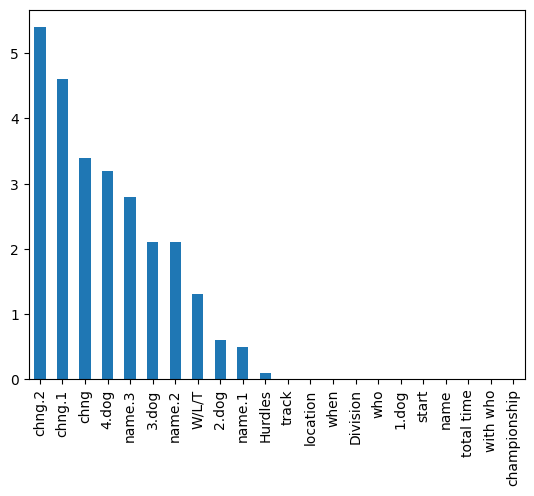

In [50]:
# Calculate the % of missing values
((df_cz.isna().sum()/len(df_cz))*100).round(1).sort_values(ascending=False).plot.bar()

# Concat the EFC and CZ race data

In [51]:
# Reorder the columns
df_efc = df_efc[df_cz.columns]

# Concat
df = pd.concat([df_cz, df_efc])
df.head()

,Division,who,with who,total time,W/L/T,Hurdles,name,start,1.dog,name.1,...,name.2,chng.1,3.dog,name.3,chng.2,4.dog,when,location,track,championship
0,1.0,WildRunners dreamers,WildRunners Maximini,17.01,L,25.0,Sunny,-0.24,4.21,Dixie,...,Alex,0.16,4.22,Hector,ok,4.13,2023-04-22 10:11:57,Heroltice,4,cz
1,1.0,WildRunners Maximini,WildRunners dreamers,19.43,L,25.0,Brooke,-0.11,4.08,Rocky,...,Bella,0.23,4.52,Bree,OK,4.28,2023-04-22 10:11:57,Heroltice,5,cz
2,1.0,WildRunners dreamers,WildRunners Maximini,17.42,W,25.0,Sunny,0.02,4.25,Dixie,...,Alex,0.34,4.25,Hector,OK,4.18,2023-04-22 10:13:25,Heroltice,4,cz
3,1.0,WildRunners Maximini,WildRunners dreamers,18.59,L,25.0,Brooke,-0.63,4.25,Rocky,...,Bella,0.16,4.56,Bree,-0.33,4.28,2023-04-22 10:13:25,Heroltice,5,cz
4,1.0,WildRunners dreamers,WildRunners Maximini,16.73,W,25.0,Sunny,-0.06,4.21,Dixie,...,Alex,0.12,4.27,Hector,error,4.08,2023-04-22 10:15:06,Heroltice,4,cz


In [52]:
# Convert the 'OK' values in the change time column to 0 num value. The 'OK' results means the 'almost perfect', thus the 0 time
df.replace({"ok": 0, "OK": 0}, inplace=True)

In [53]:
# Drop the NaN values where the ratio exceeds 3%, but retain the rest columns as I could lose useful information by removing these
df.dropna(subset=['name','Hurdles','2.dog','name.1','W/L/T','name.2','name.3','4.dog'],inplace=True)

# Ratio of remained NaN values
print(((df.isna().sum()/len(df))*100).round(1).sort_values(ascending=False)[:5])

chng        2.5
chng.1      2.4
chng.2      2.2
Division    0.0
name.2      0.0
dtype: float64


In [54]:
# Check whether can I replace the missing change time information. Maybe, I can replace these according to the total runtimes.
# The necessary steps: Convert the records to numeric type and ignore errors:
numeric_columns = ['start', '1.dog', 'chng', '2.dog', 'chng.1', '3.dog', 'chng.2', '4.dog']
df_num = df.copy()
df_num[numeric_columns] = df_num[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the total runtime from the part-runtimes
sum_of_columns = df_num[numeric_columns].sum(axis=1)

# Calculate the difference between the real total runtimes and the calculated runtimes
df_num['diff'] = df_num['total time'] - sum_of_columns

# Print the number of rows when the calculation error are greater then 0.1 sec
(df_num['diff']<0.1).value_counts()

diff
True     6805
False    1406
Name: count, dtype: int64

- In cases of 1406, the calculation error exceeded 0.1 sec, so I can't replace the missing values according to this method.

In [55]:
name = df['name.3'].value_counts()

In [56]:
# There are a num value in the column 'name', so ' drop it
df = df.drop(df[df['name']==0].index)

In [57]:
df[df['name']==0]
df.shape

(8199, 22)

## Export data

In [58]:
# Export the cleaned race data into csv
df.to_csv('./../data/cleaned/race_data.csv',index=False)